In [2]:
!unzip "/content/drive/MyDrive/4 курс/NLP/ДЗ1/public_data (1).zip"

Archive:  /content/drive/MyDrive/4 курс/NLP/ДЗ1/public_data (1).zip
  inflating: test_data.csv           
  inflating: train_data.csv          
  inflating: train_solution.csv      


In [3]:
!unzip "/content/drive/MyDrive/4 курс/NLP/ДЗ1/archive (3).zip"

Archive:  /content/drive/MyDrive/4 курс/NLP/ДЗ1/archive (3).zip
  inflating: News_Category_Dataset_v3.json  


In [4]:
! cp "/content/drive/MyDrive/4 курс/NLP/ДЗ1/students_dubki_chat.csv" .

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
from nltk.corpus import stopwords
import nltk 
from nltk.tokenize import TweetTokenizer

# NEW_data

In [ ]:
df = pd.read_json('/content/News_Category_Dataset_v3.json', lines=True)
df.category.value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [ ]:
new_data = df[df['category'] == 'STYLE & BEAUTY'].short_description
categoty = pd.Series([2 for i in range(len(new_data))])

In [ ]:
new_data = pd.DataFrame(new_data).reset_index()

In [ ]:
new_data['category'] = pd.Series([2 for i in range(len(new_data))])

In [ ]:
new_data =new_data.drop('index', axis=1)

In [ ]:
len(new_data)

9814

In [ ]:
new_data

,short_description,category
0,"Quick solutions to fix your farmer’s tan, from body makeup to self tanner.",2
1,"Jell-O is bouncy, jiggly and always snaps back after the slightest movement. According to the latest TikTok trend, your skin should be the same way.",2
2,Here's what to order now so you'll be itch-free all summer.,2
3,Ditch the discomfort down there with these dermatologist-recommended tips.,2
4,Experts explain the signs of melanoma to look out for on your skin.,2
...,...,...
9809,"Camila Alves' style is proof that you don't have to wear a mini-skirt to be sexy. Instead of flashing her gams, Alves often",2
9810,"From De Lune: Another beautiful day here in NYC comparable to springtime in April. Well, at least yesterday was. Classes",2
9811,"From Refinery29: When we tell you Lily Kwong is everything, we're not using the same inflection as when, say, we're talking",2
9812,WHAT: Two of the fashion industry's most stylish girls stepped out in gorgeous spring 2012 looks from Louis Vuitton. For,2


In [ ]:
new_data.to_csv('new_data_fashion.csv')

In [ ]:
del df
del new_data

# DATA_for_CNN

In [6]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)
nltk.download("stopwords")
tknzr = TweetTokenizer()
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
df = pd.read_csv("train_data.csv")
labels = pd.read_csv("train_solution.csv")

In [8]:
df = df.merge(labels, left_on='id', right_on='id')


In [9]:
df.head()

,id,message,category
0,271828,"Over $616 million in Bitcoin was electrocated in September with Wrapped Bitcoin (WBTC) data from CoinDesk. The emissions increased by more than 160 per cent compared to August, when $232 million was currentized. WBTC's output grew along with the demand for over-the-counter (OTC) market, reported by Grapefruit Trading. It became one of the first OTC platforms to release WBTC via the BitGo service. The Grapefruit Trading Trader Getty Hill claims that clients' interest in translating bitcoin into WBTC comes from their desire to use the first cryptation in the decentralized finance ecosystem (DeFi). CEO's FTX Exchange Sam Bankman-Frid acknowledged that the demand for WBTC at the OTC market remained significant, though not as high as it had been in previous months during the rapid rise o...",1
1,271829,Quiz: Thursday or friday?,0
2,271830,"The Australian Revenue Authority will start collecting taxes from crypto transactions this year. The Authority has developed methods to search for and identify cryptovaly investors. In March 2018, the Australian Revenue Authority announced that the forthcoming identification process would involve AML and bilateral agreements. The data comparison method will also be used to deonymize buyers of crypthalates. Tax agent Liz Russell notes that most users will soon be identified and their debts will be known. The authorities believe that, because of Bitcoin's recent strong appreciation to $200,000, investors could have earned profits that were not recorded in their tax obligations. If users have suffered losses, these amounts can be deducted from taxable profits. The Authority recalls tha...",1
3,271831,Let's continue😉. I present to you my new review,2
4,271832,Here comes your future palette.,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3844 entries, 0 to 3843
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3844 non-null   int64 
 1   message   3844 non-null   object
 2   category  3844 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 120.1+ KB


In [ ]:
# new_data = pd.read_csv('/content/new_data_fashion.csv')

In [ ]:
# new_data

In [ ]:
# new_data = new_data.rename(columns={"Unnamed: 0": "id", "short_description": "message"})

In [ ]:
# new_data.info()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3844 entries, 0 to 3843
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3844 non-null   int64 
 1   message   3844 non-null   object
 2   category  3844 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 120.1+ KB


In [12]:
df

,id,message,category
0,271828,"Over $616 million in Bitcoin was electrocated in September with Wrapped Bitcoin (WBTC) data from CoinDesk. The emissions increased by more than 160 per cent compared to August, when $232 million was currentized. WBTC's output grew along with the demand for over-the-counter (OTC) market, reported by Grapefruit Trading. It became one of the first OTC platforms to release WBTC via the BitGo service. The Grapefruit Trading Trader Getty Hill claims that clients' interest in translating bitcoin into WBTC comes from their desire to use the first cryptation in the decentralized finance ecosystem (DeFi). CEO's FTX Exchange Sam Bankman-Frid acknowledged that the demand for WBTC at the OTC market remained significant, though not as high as it had been in previous months during the rapid rise o...",1
1,271829,Quiz: Thursday or friday?,0
2,271830,"The Australian Revenue Authority will start collecting taxes from crypto transactions this year. The Authority has developed methods to search for and identify cryptovaly investors. In March 2018, the Australian Revenue Authority announced that the forthcoming identification process would involve AML and bilateral agreements. The data comparison method will also be used to deonymize buyers of crypthalates. Tax agent Liz Russell notes that most users will soon be identified and their debts will be known. The authorities believe that, because of Bitcoin's recent strong appreciation to $200,000, investors could have earned profits that were not recorded in their tax obligations. If users have suffered losses, these amounts can be deducted from taxable profits. The Authority recalls tha...",1
3,271831,Let's continue😉. I present to you my new review,2
4,271832,Here comes your future palette.,2
...,...,...,...
3839,275667,"On the air, the shooter's kms and the man who asked about the favourite subpoena were poking his eyeballs with an elgey style, but instead of the Sionar Booooy, he started talking about the saying about the mistress, the borsch, and the pots. Well, you know, the good mistress of the borsche in any pot tastes good. Anyway, no matter what!!! Publicly, I refuse my words because today I painted the arrows of SHIT!!!!!! It's some kind of hell, I swear. If there's hell, it's where I talk to people all the time and draw the arrows with a brush. Anyway, it turns out I had a very limited function: I could draw the brand arrows with a pencil, a liquid substrate with a thin brush, and a marker-shaped liner. That's the secret to success. Why did I get in the wrong place at all? I don't know wha...",2
3840,275668,This shit that's off-the-books.,0
3841,275669,"Time to go to the sky, tabor.",2
3842,275670,uraaaaaaaa,0


In [ ]:
# len(new_data) + len(df)

/# new data add

In [13]:
!cp "/content/drive/MyDrive/4 курс/NLP/ДЗ1/students_dubki_chat.csv" .
!cp "/content/drive/MyDrive/4 курс/NLP/ДЗ1/nlp_chat.csv" .
!cp "/content/drive/MyDrive/4 курс/NLP/ДЗ1/ANNA_Sultanova_tg_canal.csv" .
!cp "/content/drive/MyDrive/4 курс/NLP/ДЗ1/biutisnaya_blog.csv" .
!cp "/content/drive/MyDrive/4 курс/NLP/ДЗ1/cripto_chanal.csv" .
!cp "/content/drive/MyDrive/4 курс/NLP/ДЗ1/cripto_chanal_2.csv" . 
!cp "/content/drive/MyDrive/4 курс/NLP/ДЗ1/moda_fashio_beauty_blog.csv" . 

In [14]:
dubki_chat = pd.read_csv('/content/students_dubki_chat.csv')
dubki_chat = dubki_chat[['message', 'category']]

nlp_chat = pd.read_csv('/content/nlp_chat.csv')
nlp_chat = nlp_chat[['message', 'category']]

cripto_chanal = pd.read_csv('/content/cripto_chanal.csv')
cripto_chanal = cripto_chanal[['message', 'category']]

cripto_chanal_2 = pd.read_csv('/content/cripto_chanal_2.csv')
cripto_chanal_2 = cripto_chanal_2[['message', 'category']]

ANNA_Sultanova_tg_canal = pd.read_csv('/content/ANNA_Sultanova_tg_canal.csv')
ANNA_Sultanova_tg_canal = ANNA_Sultanova_tg_canal[['message', 'category']]

biutisnaya_blog = pd.read_csv('/content/biutisnaya_blog.csv')
biutisnaya_blog = biutisnaya_blog[['message', 'category']]

moda_fashio_beauty_blog = pd.read_csv('/content/moda_fashio_beauty_blog.csv')
moda_fashio_beauty_blog = moda_fashio_beauty_blog[['message', 'category']]



In [15]:
df = pd.concat([df,
                dubki_chat,
                nlp_chat,
                cripto_chanal,
                cripto_chanal_2,
                ANNA_Sultanova_tg_canal,
                biutisnaya_blog,
                moda_fashio_beauty_blog],
                axis=0)

In [16]:
df

,id,message,category
0,271828.0,"Over $616 million in Bitcoin was electrocated in September with Wrapped Bitcoin (WBTC) data from CoinDesk. The emissions increased by more than 160 per cent compared to August, when $232 million was currentized. WBTC's output grew along with the demand for over-the-counter (OTC) market, reported by Grapefruit Trading. It became one of the first OTC platforms to release WBTC via the BitGo service. The Grapefruit Trading Trader Getty Hill claims that clients' interest in translating bitcoin into WBTC comes from their desire to use the first cryptation in the decentralized finance ecosystem (DeFi). CEO's FTX Exchange Sam Bankman-Frid acknowledged that the demand for WBTC at the OTC market remained significant, though not as high as it had been in previous months during the rapid rise o...",1
1,271829.0,Quiz: Thursday or friday?,0
2,271830.0,"The Australian Revenue Authority will start collecting taxes from crypto transactions this year. The Authority has developed methods to search for and identify cryptovaly investors. In March 2018, the Australian Revenue Authority announced that the forthcoming identification process would involve AML and bilateral agreements. The data comparison method will also be used to deonymize buyers of crypthalates. Tax agent Liz Russell notes that most users will soon be identified and their debts will be known. The authorities believe that, because of Bitcoin's recent strong appreciation to $200,000, investors could have earned profits that were not recorded in their tax obligations. If users have suffered losses, these amounts can be deducted from taxable profits. The Authority recalls tha...",1
3,271831.0,Let's continue😉. I present to you my new review,2
4,271832.0,Here comes your future palette.,2
...,...,...,...
289,NaN,"Exaggerated details were in high demand in 2019, and there is a reason for this: oversized sunglasses like Dior, oversized coats like those from Balenciaga, and puffy sleeves are consistently eye-catching. Apparently, no one wants to stop there, and in 2020 the volumes will only increase.",2
290,NaN,"Jeanette Friis Madsen and Tora Valdimars, a duo from the Danish brand Rotate by Birger Christensen, sat in the front row of the Alessandra Rich show. Both girls are good at making fashion statements. ""We're huge Eighties fans,"" says Valdimars, who says the voluminous shoulder line gives her a sense of power and sexiness. Especially when it comes to evening dresses, balanced by an adjacent silhouette at the bottom of the set. “The puffy sleeves look amazing in photos and fit literally into any picture,” adds Tora. Illustrations of this trend can be easily found on Instagram using the hashtag",2
291,NaN,"RAG AND HOLES ""Now we have a whole department that ages and soils things,"" Demna said after the Balenciaga show, which took place in a pile of dirt. He is not alone in this season exploring the theme of clothing destruction. New Prada dresses seem to be torn right on the body, leaving holes with protruding threads on the back. The Diesel jeans have chunks of denim dragging along the back - dark, apocalyptic, but witty in terms of design.",2
292,NaN,"Paris Fashion Week While the schedule for Paris Fashion Week is still unknown, the fact that it will take place at all is good news. Paris was the first to announce a return to the ""physical"" presentation format, and in early June, the Haute Couture and Ready-to-Wear Federation released a statement that the local Fashion Week would be held in compliance with all the safety rules recommended by the French government. We are looking forward to what shows the mastodons of the industry have prepared for us in the current conditions.",2


In [17]:
df.category.value_counts()

0    11845
1     6120
2     2973
Name: category, dtype: int64

In [18]:
# df = pd.concat([df, new_data], axis=0)

In [19]:
df

,id,message,category
0,271828.0,"Over $616 million in Bitcoin was electrocated in September with Wrapped Bitcoin (WBTC) data from CoinDesk. The emissions increased by more than 160 per cent compared to August, when $232 million was currentized. WBTC's output grew along with the demand for over-the-counter (OTC) market, reported by Grapefruit Trading. It became one of the first OTC platforms to release WBTC via the BitGo service. The Grapefruit Trading Trader Getty Hill claims that clients' interest in translating bitcoin into WBTC comes from their desire to use the first cryptation in the decentralized finance ecosystem (DeFi). CEO's FTX Exchange Sam Bankman-Frid acknowledged that the demand for WBTC at the OTC market remained significant, though not as high as it had been in previous months during the rapid rise o...",1
1,271829.0,Quiz: Thursday or friday?,0
2,271830.0,"The Australian Revenue Authority will start collecting taxes from crypto transactions this year. The Authority has developed methods to search for and identify cryptovaly investors. In March 2018, the Australian Revenue Authority announced that the forthcoming identification process would involve AML and bilateral agreements. The data comparison method will also be used to deonymize buyers of crypthalates. Tax agent Liz Russell notes that most users will soon be identified and their debts will be known. The authorities believe that, because of Bitcoin's recent strong appreciation to $200,000, investors could have earned profits that were not recorded in their tax obligations. If users have suffered losses, these amounts can be deducted from taxable profits. The Authority recalls tha...",1
3,271831.0,Let's continue😉. I present to you my new review,2
4,271832.0,Here comes your future palette.,2
...,...,...,...
289,NaN,"Exaggerated details were in high demand in 2019, and there is a reason for this: oversized sunglasses like Dior, oversized coats like those from Balenciaga, and puffy sleeves are consistently eye-catching. Apparently, no one wants to stop there, and in 2020 the volumes will only increase.",2
290,NaN,"Jeanette Friis Madsen and Tora Valdimars, a duo from the Danish brand Rotate by Birger Christensen, sat in the front row of the Alessandra Rich show. Both girls are good at making fashion statements. ""We're huge Eighties fans,"" says Valdimars, who says the voluminous shoulder line gives her a sense of power and sexiness. Especially when it comes to evening dresses, balanced by an adjacent silhouette at the bottom of the set. “The puffy sleeves look amazing in photos and fit literally into any picture,” adds Tora. Illustrations of this trend can be easily found on Instagram using the hashtag",2
291,NaN,"RAG AND HOLES ""Now we have a whole department that ages and soils things,"" Demna said after the Balenciaga show, which took place in a pile of dirt. He is not alone in this season exploring the theme of clothing destruction. New Prada dresses seem to be torn right on the body, leaving holes with protruding threads on the back. The Diesel jeans have chunks of denim dragging along the back - dark, apocalyptic, but witty in terms of design.",2
292,NaN,"Paris Fashion Week While the schedule for Paris Fashion Week is still unknown, the fact that it will take place at all is good news. Paris was the first to announce a return to the ""physical"" presentation format, and in early June, the Haute Couture and Ready-to-Wear Federation released a statement that the local Fashion Week would be held in compliance with all the safety rules recommended by the French government. We are looking forward to what shows the mastodons of the industry have prepared for us in the current conditions.",2


In [20]:
# dubki_chat = pd.read_csv('/content/students_dubki_chat.csv')

In [21]:
# dubki_chat = dubki_chat[['message', 'category']]

In [22]:
# dubki_chat

In [23]:
# df = pd.concat([df, dubki_chat], axis=0)

In [24]:
df.drop(['id'],axis=1,inplace=True)

In [25]:
df

,message,category
0,"Over $616 million in Bitcoin was electrocated in September with Wrapped Bitcoin (WBTC) data from CoinDesk. The emissions increased by more than 160 per cent compared to August, when $232 million was currentized. WBTC's output grew along with the demand for over-the-counter (OTC) market, reported by Grapefruit Trading. It became one of the first OTC platforms to release WBTC via the BitGo service. The Grapefruit Trading Trader Getty Hill claims that clients' interest in translating bitcoin into WBTC comes from their desire to use the first cryptation in the decentralized finance ecosystem (DeFi). CEO's FTX Exchange Sam Bankman-Frid acknowledged that the demand for WBTC at the OTC market remained significant, though not as high as it had been in previous months during the rapid rise o...",1
1,Quiz: Thursday or friday?,0
2,"The Australian Revenue Authority will start collecting taxes from crypto transactions this year. The Authority has developed methods to search for and identify cryptovaly investors. In March 2018, the Australian Revenue Authority announced that the forthcoming identification process would involve AML and bilateral agreements. The data comparison method will also be used to deonymize buyers of crypthalates. Tax agent Liz Russell notes that most users will soon be identified and their debts will be known. The authorities believe that, because of Bitcoin's recent strong appreciation to $200,000, investors could have earned profits that were not recorded in their tax obligations. If users have suffered losses, these amounts can be deducted from taxable profits. The Authority recalls tha...",1
3,Let's continue😉. I present to you my new review,2
4,Here comes your future palette.,2
...,...,...
289,"Exaggerated details were in high demand in 2019, and there is a reason for this: oversized sunglasses like Dior, oversized coats like those from Balenciaga, and puffy sleeves are consistently eye-catching. Apparently, no one wants to stop there, and in 2020 the volumes will only increase.",2
290,"Jeanette Friis Madsen and Tora Valdimars, a duo from the Danish brand Rotate by Birger Christensen, sat in the front row of the Alessandra Rich show. Both girls are good at making fashion statements. ""We're huge Eighties fans,"" says Valdimars, who says the voluminous shoulder line gives her a sense of power and sexiness. Especially when it comes to evening dresses, balanced by an adjacent silhouette at the bottom of the set. “The puffy sleeves look amazing in photos and fit literally into any picture,” adds Tora. Illustrations of this trend can be easily found on Instagram using the hashtag",2
291,"RAG AND HOLES ""Now we have a whole department that ages and soils things,"" Demna said after the Balenciaga show, which took place in a pile of dirt. He is not alone in this season exploring the theme of clothing destruction. New Prada dresses seem to be torn right on the body, leaving holes with protruding threads on the back. The Diesel jeans have chunks of denim dragging along the back - dark, apocalyptic, but witty in terms of design.",2
292,"Paris Fashion Week While the schedule for Paris Fashion Week is still unknown, the fact that it will take place at all is good news. Paris was the first to announce a return to the ""physical"" presentation format, and in early June, the Haute Couture and Ready-to-Wear Federation released a statement that the local Fashion Week would be held in compliance with all the safety rules recommended by the French government. We are looking forward to what shows the mastodons of the industry have prepared for us in the current conditions.",2


In [26]:
!pip install -q pymorphy2

     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 8.2 MB 10.3 MB/s 


In [27]:
import pymorphy2
from functools import lru_cache
from multiprocessing import Pool
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as tqdm
import re

In [28]:
m = pymorphy2.MorphAnalyzer()

regex = re.compile("[А-Яа-я:=!\)\()A-z\_\%/|]+")

def words_only(text, regex=regex):
    try:
        return regex.findall(text)
    except:
        return []
def tweeter_only(text, regex=regex):
    try:
        return tknzr.tokenize(text)
    except:
        return []
def lemmatize(text, pymorphy=m):
    try:
        return " ".join([pymorphy.parse(w)[0].normal_form for w in text])
    except:
        return " "    
def clean_text(text):
    text = re.sub(r'https?://\S+', ' url ', text)
    return lemmatize(words_only(text))

### TFIDF

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df , test_size=0.25, random_state=42, shuffle=True)

In [ ]:
with Pool(8) as p:
    lemmas = list(tqdm(p.imap(clean_text, X_train['message']), total=len(X_train)))

X_train['lemmas'] = lemmas
X_train.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/15703 [00:00<?, ?it/s]

,message,category,lemmas
166,"I recently subscribed to the NEBOGEN channel, which has already become a cult. Why cult? Yes, because only Nebozhena can smash all the heroes of gloss so sharply. Merciless surveys of the Russian world from Moscow to Curonian. Operational information about which of the glossy heroes fell ill with coronavirus, conflicts in secular and political parties, reviews of the economy, alcohol, politics, diets and the best lifestyle practices during COVID-19. And most importantly, without insults and with a great sense of humor. Subscribe, without Nebozhena the tape is not the same: https://t.me/imnotbozhena",2,i recently subscribed to the nebogen channel which has already become a cult why cult yes because only nebozhena can smash all the heroes of gloss so sharply merciless surveys of the russian world from moscow to curonian operational information about which of the glossy heroes fell ill with coronavirus conflicts in secular and political parties reviews of the economy alcohol politics diets and the best lifestyle practices during covid and most importantly without insults and with a great sense of humor subscribe without nebozhena the tape is not the same: url
35,"12,423 BTC, which belong to the scammers from PlusToken, came into motion 😱 There is no evidence yet that these funds will hit the exchanges and the sale will start again. But the community is already sounding the alarm and fearing a new dump... The question arises, is PlusToken really going to enter the cache again, or is someone creating the necessary informational occasion to manipulate the market?",1,btc which belong to the scammers from plustoken came into motion there is no evidence yet that these funds will hit the exchanges and the sale will start again but the community is already sounding the alarm and fearing a new dump the question arises is plustoken really going to enter the cache again or is someone creating the necessary informational occasion to manipulate the market
148,"Just in case, I start the day with such morning shows. You have to be ready for anything...",2,just in case i start the day with such morning shows you have to be ready for anything
7216,"Unknown canoe, but smells nice",0,unknown canoe but smells nice
7596,Ino citizens did you get a scholarship?,0,ino citizens did you get a scholarship
1184,"Buffett decided to buy some rat poison squared BTC 🤨According to the financial statements of Berkshire Hathaway, the holding acquired shares in the Brazilian bank Nubank, whose clients can invest in cryptocurrency ETFs. Either Buffett changed his mind, or his managers got more freedom, but the latest deals with a decrease in the share in banks and payment systems and gaining positions in fintech, point to Berkshire Hathaway's attempts to be in trend.",1,buffett decided to buy some rat poison squared btc according to the financial statements of berkshire hathaway the holding acquired shares in the brazilian bank nubank whose clients can invest in cryptocurrency etfs either buffett changed his mind or his managers got more freedom but the latest deals with a decrease in the share in banks and payment systems and gaining positions in fintech point to berkshire hathaway s attempts to be in trend
1890,"Peter Brandt again gives a bad forecast for XRP 😳On the XRP/BTC daily chart, a trader found a head and shoulders pattern, the execution of which will lead to a strong strait.",1,peter brandt again gives a bad forecast for xrp on the xrp/btc daily chart a trader found a head and shoulders pattern the execution of which will lead to a strong strait
3545,"Damn, how beautiful I am here. You know how to choose a photo!",0,damn how beautiful i am here you know how to choose a photo!
355,"You can always address her in Telegram, if you want fast answer 😉",0,you can always address her in telegram if you want fast answer
8309,Second floor of the courtyard,0,second floor of the courtyard


In [ ]:
with Pool(8) as p:
    lemmas = list(tqdm(p.imap(clean_text, X_test['message']), total=len(X_test)))
X_test['lemmas'] = lemmas
X_test.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/5235 [00:00<?, ?it/s]

,message,category,lemmas
1535,"Alibi, it's alright",0,alibi it s alright
569,"✅ Market news as of 06.09:🔹 Bitcoin (BTC) price has been consolidating around $30,000 for more than a month🔹 A little-known altcoin soared by 400% after the announcement of a possible listing on Coinbase🔹 75% of US retailers plan to accept payments in cryptocurrencies🔹 The Osmosis team announced the timing platform recovery🔹 “Father of the Metaverses” Neil Stevenson will create the LAMINA1 blockchain🔹 South Korean crypto exchanges are ready for self-regulation, the ruling party says 🔹 Tether launched the USDT stablecoin on the Tezos blockchain platform🔹 Binance Pay to support offline cryptocurrency payments for NFT in Artaverse📌 Exchange Rates as of 09.06:• BTCUSD - 30.300 (↑ 0.32%)• ETHUSD - 1.805 (↑ 0.78%)• SOLUSD - 40.90 (↑ 5.33%)• USDRUB - 56.75 (↓ 5.79%)• USDUAH - 29.54 (↓ 0.03%) ...",1,market news as of : bitcoin (btc) price has been consolidating around for more than a month a little known altcoin soared by % after the announcement of a possible listing on coinbase % of us retailers plan to accept payments in cryptocurrencies the osmosis team announced the timing platform recovery father of the metaverses neil stevenson will create the lamina blockchain south korean crypto exchanges are ready for self regulation the ruling party says tether launched the usdt stablecoin on the tezos blockchain platform binance pay to support offline cryptocurrency payments for nft in artaverse exchange rates as of : btcusd ( %) ethusd ( %) solusd ( %) usdrub ( %) usduah ( %) usdkzt ( %)coin news
2501,Hahahaha what are you scared of?,0,hahahaha what are you scared of
5961,"And you ask the admin panel who, according to the documents, lives with you",0,and you ask the admin panel who according to the documents lives with you
791,What are the authorities ready to do so that you do not buy bitcoin to protect against inflation 😅,1,what are the authorities ready to do so that you do not buy bitcoin to protect against inflation
970,"All right, Sunday morning knots! Karastics is because you're lying on the couch and you're saying it's hard, I don't understand it as a fish in my favorite stickerpack. Let's discuss the masks from L\Oreal.",2,all right sunday morning knots! karastics is because you re lying on the couch and you re saying it s hard i don t understand it as a fish in my favorite stickerpack let s discuss the masks from l\oreal
1701,Who is making noise in the first building?,0,who is making noise in the first building
744,"Dratoui, the hero of women's tears.",2,dratoui the hero of women s tears
300,but even Bert's simple fine-tuning is not even 3-4 hours on powerful video cameras,0,but even bert s simple fine tuning is not even hours on powerful video cameras
6874,Still relevant?,0,still relevant


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=4000, min_df=10, max_df=0.8, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(X_train.lemmas.to_list()).toarray()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
log_reg = LogisticRegression(random_state=0, solver="newton-cg")
log_reg.fit(X, X_train['category']) 

LogisticRegression(random_state=0, solver='newton-cg')

In [ ]:
classifier = RandomForestClassifier(n_estimators=400, random_state=2)
classifier.fit(X, X_train['category']) 

RandomForestClassifier(n_estimators=400, random_state=2)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, X_train['category'])

BernoulliNB()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

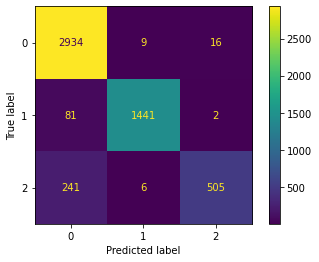

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2959
           1       0.99      0.95      0.97      1524
           2       0.97      0.67      0.79       752

    accuracy                           0.93      5235
   macro avg       0.95      0.87      0.90      5235
weighted avg       0.94      0.93      0.93      5235

accuracy_score =  0.9321872015281757


In [ ]:
X_test_array = tfidfconverter.transform(X_test.lemmas.to_list()).toarray()
y_pred = log_reg.predict(X_test_array)

cm = confusion_matrix(X_test['category'],y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
disp.plot()

plt.show()
print(classification_report(X_test['category'],y_pred))
print('accuracy_score = ', accuracy_score(X_test['category'], y_pred))

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_pred, X_test['category'])

0.952128875766543

# Submition

In [ ]:
submition = pd.read_csv('test_data.csv')

In [ ]:
submition

,id,message
0,275672,But a lot of people have a job fair tonight.
1,275673,"Also, I got only 4 answers on the google form ..."
2,275674,"Vladimir, when will we have seminar?"
3,275675,"A couple at 111, too?"
4,275676,"It's on Anti-buying. And again, Zara:"
...,...,...
5922,3143750,"The second thing, write all questions and thoughts about statistics in this doc:"
5923,3143751,Can Grayscale Actually Sell Bitcoin (BTC) After Unlock of GBTC Shares?
5924,3143752,It's not a very operational dude putting them on the schedule. Wednesday is the first two online.
5925,3143753,"Inspired by Sonia Miro's goddess and made a hell of a shooter. Lyner is a cat eyes Art Vision. It's not exactly sturdy, but it's thin enough for TV and CREATIVA."


In [ ]:
with Pool(8) as p:
    lemmas = list(tqdm(p.imap(clean_text, submition['message']), total=len(submition)))
submition['lemmas'] = lemmas
submition.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/5927 [00:00<?, ?it/s]

,id,message,lemmas
166,275838,"It's a good hour! All right, guys, it's kind of like a technical election of more than half the people for it. Let's go to school. Division?",it s a good hour! all right guys it s kind of like a technical election of more than half the people for it let s go to school division
602,276274,😍Remove Shortcut Virus From Your Pc😍 🔻 Method 1. - Clean up and remove Shortcut Virus by CMD - 1. Click on Start and select Run; 2. Type: CMD and Hit Enter to open Command Prompt; 3. Type the drive letter of your hard drive partition in PC or USB flash drive and hit Enter; (G for example.) 4. Type: attrib g:*.*,remove shortcut virus from your pc method clean up and remove shortcut virus by cmd click on start and select run type: cmd and hit enter to open command prompt type the drive letter of your hard drive partition in pc or usb flash drive and hit enter (g for example ) type: attrib g:
3199,278876,"Well, neither do I.",well neither do i
5113,3142941,"Maybe you didn't know either, I didn't.) but the airfleet charges miles for asos, lamodu, bodishop, volatile. You've never hidden an Internet store in an office that useful before.",maybe you didn t know either i didn t ) but the airfleet charges miles for asos lamodu bodishop volatile you ve never hidden an internet store in an office that useful before
1565,277238,"India’s Biggest Cryptocurrency Airdrop Ever! Have you claimed your $200 worth CIN Tokens yet? 👀 Participate in the biggest ever Airdrop in India ""FREE"" Just click -",india s biggest cryptocurrency airdrop ever! have you claimed your worth cin tokens yet participate in the biggest ever airdrop in india free just click
4,275676,"It's on Anti-buying. And again, Zara:",it s on anti buying and again zara:
4397,3142225,Why didn't the Columbian get erased?,why didn t the columbian get erased
2755,278430,"Ask him where he lives, or he can have his phone number or a TV number, if you have to bring him a sheet.",ask him where he lives or he can have his phone number or a tv number if you have to bring him a sheet
2839,278514,"Presumably, 7 is busy.",presumably is busy
1437,277109,But my knowledge of the terver and the math. superficial,but my knowledge of the terver and the math superficial


In [ ]:
X_ans = tfidfconverter.transform(submition.lemmas.to_list())

In [ ]:
ans = log_reg.predict(X_ans)


In [ ]:
submition['category'] = ans

In [ ]:
submition

,id,message,lemmas,category
0,275672,But a lot of people have a job fair tonight.,but a lot of people have a job fair tonight,2
1,275673,"Also, I got only 4 answers on the google form ...",also i got only answers on the google form,0
2,275674,"Vladimir, when will we have seminar?",vladimir when will we have seminar,0
3,275675,"A couple at 111, too?",a couple at too,0
4,275676,"It's on Anti-buying. And again, Zara:",it s on anti buying and again zara:,0
...,...,...,...,...
5922,3143750,"The second thing, write all questions and thoughts about statistics in this doc:",the second thing write all questions and thoughts about statistics in this doc:,0
5923,3143751,Can Grayscale Actually Sell Bitcoin (BTC) After Unlock of GBTC Shares?,can grayscale actually sell bitcoin (btc) after unlock of gbtc shares,1
5924,3143752,It's not a very operational dude putting them on the schedule. Wednesday is the first two online.,it s not a very operational dude putting them on the schedule wednesday is the first two online,0
5925,3143753,"Inspired by Sonia Miro's goddess and made a hell of a shooter. Lyner is a cat eyes Art Vision. It's not exactly sturdy, but it's thin enough for TV and CREATIVA.",inspired by sonia miro s goddess and made a hell of a shooter lyner is a cat eyes art vision it s not exactly sturdy but it s thin enough for tv and creativa,2


In [ ]:
answer_for_only_1_class = submition[['id', 'category']]

In [ ]:
answer_for_only_1_class.head()

,id,category
0,275672,2
1,275673,0
2,275674,0
3,275675,0
4,275676,0


In [ ]:
answer_for_only_1_class['category'].value_counts()

0    4371
1     876
2     680
Name: category, dtype: int64

In [ ]:
answer.to_csv("ans.csv", index = False)

NameError: ignored

### CNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df , test_size=0.15, random_state=42, shuffle=True)

In [ ]:
with Pool(8) as p:
    lemmas = list(tqdm(p.imap(clean_text, df['message']), total=len(df)))

df['lemmas'] = lemmas
df.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/20938 [00:00<?, ?it/s]

,message,category,lemmas
1816,here at 7:40 you need to start singing Jewish songs,0,here at : you need to start singing jewish songs
9112,Only beneficiaries,0,only beneficiaries
9712,The ambulances did not follow the guys stupidly. So it's not a fact that you would go to the hospital,0,the ambulances did not follow the guys stupidly so it s not a fact that you would go to the hospital
41,"You can also leave for goals unrelated to ""I will not pass the session and I will be expelled""",0,you can also leave for goals unrelated to i will not pass the session and i will be expelled
47,"The University of Kansas is promoting the thesis that it is impossible to accurately determine the gender of the discovered skeletons. You cannot know exactly how a person defined himself. Maybe he generally defined himself through the feline gender. And among the ancient people, they say, there were even “non-binary personalities”, citing the remains with a male skeletal structure, but female jewelry as an example. Those who continue to take into account the biological sex of human remains are accused of intolerance with might and main. They are being forced to reclassify the skeletons according to modern 72 genders.",2,the university of kansas is promoting the thesis that it is impossible to accurately determine the gender of the discovered skeletons you cannot know exactly how a person defined himself maybe he generally defined himself through the feline gender and among the ancient people they say there were even non binary personalities citing the remains with a male skeletal structure but female jewelry as an example those who continue to take into account the biological sex of human remains are accused of intolerance with might and main they are being forced to reclassify the skeletons according to modern genders
2264,"Here's the twist: Donald Trump refused to sign the $900 billion aid package bill 😡Trump's key demand is to increase checks for Americans from $600 to at least $2,000. Congress has a majority vote for this bill, so the president won't be able to use veto power. But the Democrats unexpectedly took the side of Trump, who initially proposed a much larger budget. And now they are set for new negotiations.P.S. Trump added that the second aid package would still be accepted. Perhaps already by the new administration, which, perhaps, will be his administration 🤨",1,here s the twist: donald trump refused to sign the billion aid package bill trump s key demand is to increase checks for americans from to at least congress has a majority vote for this bill so the president won t be able to use veto power but the democrats unexpectedly took the side of trump who initially proposed a much larger budget and now they are set for new negotiations p s trump added that the second aid package would still be accepted perhaps already by the new administration which perhaps will be his administration
2417,Where is there a shawarma nearby?,0,where is there a shawarma nearby
4885,no but there are nuts and dried fruits 🥲,0,no but there are nuts and dried fruits
573,"⚡️ Coinbase employees called for the dismissal of the top management of the exchange🔹 Employees of the Coinbase cryptocurrency exchange published a petition demanding the dismissal of the top management of the trading platform🔹 Employees of the Coinbase cryptocurrency exchange called for the dismissal of the management of the exchange because of their decisions that harm the company. This is reported in a petition called “Operation Revive COIN”🔹 Who exactly filed the petition remains unknown, but the authors of the statement claim that recently top management has been making decisions that are “not in the interests of the company, its employees and its shareholders”Coin News",1,coinbase employees called for the dismissal of the top management of the exchange employees of the coinbase cryptocurrency exchange published a petition demanding the dismissal of the top management of the trading pla

In [ ]:
df.to_csv("data.csv", index=False)

In [ ]:
root = "/content/"
filename = "data.csv"
data = pd.read_csv(root+filename).sample(
    frac = 1, random_state = 202)
data.head()

,message,category,lemmas
10395,Why is this in this chat?,0,why is this in this chat
16166,"South Park in their repertoire: - We only accept bitcoin and other cryptocurrencies, because this is the future. - We decided that the banking system is a scam, so we trust the one-day pyramids more 😇",1,south park in their repertoire: we only accept bitcoin and other cryptocurrencies because this is the future we decided that the banking system is a scam so we trust the one day pyramids more
669,"The Pennsylvania Banking and Securities Department (DoBS) reported that there was no need for a licence for money transfer services to operate in the state. The Authority has published a manual for local cryptoval companies, which he says has been a response to numerous queries. According to the regulator, Bitcoin and other cryptivates are not money, so companies &apos; money transfer licensing laws do not apply to them. According to the law, only violet currencies can be recognized as money. ""To date, no jurisdiction in the United States has recognized the virtual currency as a legal means of payment,"" the agency writes. The Department explained that companies that made remittances and charged commissions for services should be licensed. However, the exchanges cry ""never directly"" w...",1,the pennsylvania banking and securities department (dobs) reported that there was no need for a licence for money transfer services to operate in the state the authority has published a manual for local cryptoval companies which he says has been a response to numerous queries according to the regulator bitcoin and other cryptivates are not money so companies apos money transfer licensing laws do not apply to them according to the law only violet currencies can be recognized as money to date no jurisdiction in the united states has recognized the virtual currency as a legal means of payment the agency writes the department explained that companies that made remittances and charged commissions for services should be licensed however the exchanges cry never directly with the violet and tr...
15943,"Last week, the price of bitcoin fell below the previous peak of $19,800 and closed below 200 WMA ($22,400). All the principles and indicators of BTC in this market do not seem to work, but trading volumes indicate the possibility of capitulation, and this is the first step towards returning to the bull market LUNA. And both of these stories are at risk of repeating themselves in a month, so it's not time to turn on laser eyes again 🤔But caution and greed are incompatible things, and now with extreme fear in the market (9 points), many altcoins overtake BTC in growth 🤑🔹 Top 3 in 24 hours :Synthetix - $2.77 (↑79.47%)Maker - $907.08 (↑24.30%)Basic Attention Token - $0.3686 (↑22.59%)#cryptomorning",1,last week the price of bitcoin fell below the previous peak of and closed below wma ( ) all the principles and indicators of btc in this market do not seem to work but trading volumes indicate the possibility of capitulation and this is the first step towards returning to the bull market luna and both of these stories are at risk of repeating themselves in a month so it s not time to turn on laser eyes again but caution and greed are incompatible things and now with extreme fear in the market ( points) many altcoins overtake btc in growth top in hours :synthetix ( %)maker ( %)basic attention token ( %) cryptomorning
19901,"CLARINS Lip Twist Duo Water Tint & Balm. Can be used both together and separately. The tool is double sided. On the one hand, this is a felt-tint pen with a rich, bright color, on the other, a sparkling balm with a shimmer. The marker is highly pigmented. It dries quickly on the lips, the finish is matte, the durability is very high (however, after a full meal, the middle fades faster), leaves no traces anywhere. But make-up removal is complicated. And the marker dries out the lips a bit. And now about the balm. It has a soft and nourishing texture, sof

In [ ]:
import spacy
import string

In [ ]:
#tokenization
tok = spacy.load("en_core_web_sm")
def tokenize (text):
    text = re.sub(r"[^\x00-\x7F]+", " ", text)
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]') # remove punctuation and numbers
    nopunct = regex.sub(" ", text.lower())
    return [token.text for token in tok.tokenizer(nopunct)]

In [ ]:
#tokenization
def tokenize (text):
    try:
        return text.split()
    except:
        return []

In [ ]:
from collections  import Counter

In [ ]:
counts = Counter()
for index, row in data.iterrows():
    try:
        counts.update(tokenize(row['lemmas']))
    except:
        pass

In [ ]:
#deleting infrequent words
print("num_words before:",len(counts.keys()))
for word in list(counts):
    if counts[word] < 2:
        del counts[word]
print("num_words after:",len(counts.keys()))

num_words before: 35621
num_words after: 18226


In [ ]:
#creating vocabulary
vocab2index = {"":0, "UNK":1}
words = ["", "UNK"]
for word in counts:
    vocab2index[word] = len(words)
    words.append(word)

In [ ]:
def encode_sentence(text, vocab2index, N=80):
    tokenized = tokenize(text)
    encoded = np.zeros(N, dtype=int)
    enc1 = np.array([vocab2index.get(word, vocab2index["UNK"]) for word in tokenized])
    length = min(N, len(enc1))
    encoded[:length] = enc1[:length]
    return encoded, length

In [ ]:
data['encoded'] = data['lemmas'].apply(lambda x: np.array(encode_sentence(x,vocab2index)))
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


,message,category,lemmas,encoded
10395,Why is this in this chat?,0,why is this in this chat,"[[2, 3, 4, 5, 4, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]"
16166,"South Park in their repertoire: - We only accept bitcoin and other cryptocurrencies, because this is the future. - We decided that the banking system is a scam, so we trust the one-day pyramids more 😇",1,south park in their repertoire: we only accept bitcoin and other cryptocurrencies because this is the future we decided that the banking system is a scam so we trust the one day pyramids more,"[[7, 8, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 4, 3, 19, 20, 11, 21, 22, 19, 23, 24, 3, 25, 26, 27, 11, 28, 19, 29, 30, 31, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 34]"
669,"The Pennsylvania Banking and Securities Department (DoBS) reported that there was no need for a licence for money transfer services to operate in the state. The Authority has published a manual for local cryptoval companies, which he says has been a response to numerous queries. According to the regulator, Bitcoin and other cryptivates are not money, so companies &apos; money transfer licensing laws do not apply to them. According to the law, only violet currencies can be recognized as money. ""To date, no jurisdiction in the United States has recognized the virtual currency as a legal means of payment,"" the agency writes. The Department explained that companies that made remittances and charged commissions for services should be licensed. However, the exchanges cry ""never directly"" w...",1,the pennsylvania banking and securities department (dobs) reported that there was no need for a licence for money transfer services to operate in the state the authority has published a manual for local cryptoval companies which he says has been a response to numerous queries according to the regulator bitcoin and other cryptivates are not money so companies apos money transfer licensing laws do not apply to them according to the law only violet currencies can be recognized as money to date no jurisdiction in the united states has recognized the virtual currency as a legal means of payment the agency writes the department explained that companies that made remittances and charged commissions for services should be licensed however the exchanges cry never directly with the violet and tr...,"[[19, 33, 23, 15, 34, 35, 1, 36, 22, 37, 38, 39, 40, 41, 25, 42, 41, 43, 44, 45, 46, 47, 5, 19, 48, 19, 49, 50, 51, 25, 52, 41, 53, 54, 55, 56, 57, 58, 50, 59, 25, 60, 46, 61, 62, 63, 46, 19, 64, 14, 15, 16, 65, 66, 67, 43, 27, 55, 68, 43, 44, 69, 70, 71, 67, 72, 46, 73, 63, 46, 19, 74, 12, 75, 76, 77, 78, 79, 80, 43], 80]"
15943,"Last week, the price of bitcoin fell below the previous peak of $19,800 and closed below 200 WMA ($22,400). All the principles and indicators of BTC in this market do not seem to work, but trading volumes indicate the possibility of capitulation, and this is the first step towards returning to the bull market LUNA. And both of these stories are at risk of repeating themselves in a month, so it's not time to turn on laser eyes again 🤔But caution and greed are incompatible things, and now with extreme fear in the market (9 points), many altcoins overtake BTC in growth 🤑🔹 Top 3 in 24 hours :Synthetix - $2.77 (↑79.47%)Maker - $907.08 (↑24.30%)Basic Attention Token - $0.3686 (↑22.59%)#cryptomorning",1,last week the price of bitcoin fell below the previous peak of and closed below wma ( ) all the principles and indicators of btc in this market do not seem to work but trading volumes indicate the possibility of capitulation and this is the first step towards returning to the bull market luna and both of these stories are at risk

In [ ]:
from torch.utils.data import Dataset
import torch

In [ ]:
class ReviewsDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.X)

    def get_labels(self):
        return self.y

    def __getitem__(self, idx):
        if self.y is None:
            return torch.from_numpy(self.X[idx][0].astype(np.int32)), 1, self.X[idx][1]
        return torch.from_numpy(self.X[idx][0].astype(np.int32)), self.y[idx], self.X[idx][1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import re
import spacy
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import string
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import mean_squared_error

In [ ]:
X = list(data['encoded'])
y = list(data['category'])
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [ ]:
train_ds = ReviewsDataset(X_train, y_train)
valid_ds = ReviewsDataset(X_valid, y_valid)

In [ ]:
next(iter(train_ds))

(tensor([   19,  1275,   324,     3,  1197,    19,  3633,    89,   478,  1834,
          1892,  7195,  1275,  1562,  8272,    19,  3860,  1289, 15967,   105,
          5181,  9821,    19,  1834,  1395,  2081, 16010,   629,  1834,  4804,
          1289, 16011,    50,  1345,   105,  9028,    46,  2005,   478,   173,
          4290,  9620,   164,    19,  8849,   134,    89, 11766,  6024,   989,
           316,    46,   671,  1834,  6170,  3716, 14629,  1875,   478,  1655,
          7098,  4513,    41,  1834,   604,     3,   511,   173,   483,    41,
             1,  1834,  1887,  2250,     0,     0,     0,     0,     0,     0],
        dtype=torch.int32), 1, 74)

In [ ]:
def train_model(model, epochs=10, lr=0.001):
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=lr)
    for i in range(epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for x, y, l in train_dl:
            x = x.long()
            y = y.long()
            y_pred = model(x, l)
            optimizer.zero_grad()
            loss = F.cross_entropy(y_pred, y)
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        val_loss, val_acc, val_rmse = validation_metrics(model, val_dl)
        if i % 5 == 1:
            print("train loss %.3f, val loss %.3f, val accuracy %.3f, and val rmse %.3f" % (sum_loss/total, val_loss, val_acc, val_rmse))

def validation_metrics (model, valid_dl):
    model.eval()
    correct = 0
    total = 0
    sum_loss = 0.0
    sum_rmse = 0.0
    for x, y, l in valid_dl:
        x = x.long()
        y = y.long()
        y_hat = model(x, l)
        loss = F.cross_entropy(y_hat, y)
        pred = torch.max(y_hat, 1)[1]
        correct += (pred == y).float().sum()
        total += y.shape[0]
        sum_loss += loss.item()*y.shape[0]
    return sum_loss/total, correct/total

In [ ]:
class LSTM_fixed_len(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim) :
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 3)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x, l):
        x = self.embeddings(x)
        x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        return self.linear(ht[-1])

In [ ]:
!pip install torchsampler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchsampler import ImbalancedDatasetSampler
#

In [ ]:
batch_size = 1000
vocab_size = len(words)
train_dl = DataLoader(train_ds, batch_size=batch_size,
                      sampler=ImbalancedDatasetSampler(train_ds),)
val_dl = DataLoader(valid_ds, batch_size=batch_size)

In [ ]:
# next(iter(train_dl))

In [ ]:
model_fixed =  LSTM_fixed_len(vocab_size, 50, 100)


In [ ]:
train_model(model_fixed, epochs=30, lr=0.005)


train loss 0.969, val loss 0.784, val accuracy 0.715, and val rmse 0.716
train loss 0.317, val loss 0.308, val accuracy 0.897, and val rmse 0.556
train loss 0.173, val loss 0.249, val accuracy 0.913, and val rmse 0.530
train loss 0.117, val loss 0.241, val accuracy 0.920, and val rmse 0.509
train loss 0.082, val loss 0.233, val accuracy 0.932, and val rmse 0.445


KeyboardInterrupt: ignored

In [ ]:
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout_proba):
        super().__init__()
        
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.dropout_1 = nn.Dropout(dropout_proba / 2)          
        self.conv_0 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[0], embedding_dim))
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[1], embedding_dim))
        self.conv_2 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[2], embedding_dim))
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout_2 = nn.Dropout(dropout_proba)        
    def forward(self, x):
        embedded = self.embeddings(x)
                
        embedded = embedded.unsqueeze(1)
        embedded = self.dropout_1(embedded)
        
        conved_0 = F.relu(self.conv_0(embedded).squeeze(3))
        conved_1 = F.relu(self.conv_1(embedded).squeeze(3))
        conved_2 = F.relu(self.conv_2(embedded).squeeze(3))
            
        pooled_0 = F.max_pool1d(conved_0, conved_0.shape[2]).squeeze(2)
        pooled_1 = F.max_pool1d(conved_1, conved_1.shape[2]).squeeze(2)
        pooled_2 = F.max_pool1d(conved_2, conved_2.shape[2]).squeeze(2)
        
        cat = self.dropout_2(torch.cat((pooled_0, pooled_1, pooled_2), dim=1))

        #cat = [batch size, n_filters * len(filter_sizes)]
        return self.fc(cat)

In [ ]:
INPUT_DIM = len(words)
EMBEDDING_DIM = 100
N_FILTERS = 100
FILTER_SIZES = [3,4,5]
OUTPUT_DIM = 3
DROPOUT_PROBA = 0.4

In [ ]:
def train_model(model, epochs=10, lr=0.001):
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=lr, weight_decay=1e-3)
    for i in range(epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for x, y, l in train_dl:
            x = x.long()
            y = y.long()
            optimizer.zero_grad()
            y_pred = model(x).squeeze(1)[:y.shape[0]]
            loss = F.cross_entropy(y_pred, y)
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        val_loss, val_acc = validation_metrics(model, val_dl)
        if i % 5 == 1:
            print("train loss %.3f, val loss %.3f, val accuracy %.3f" % (sum_loss/total, val_loss, val_acc))

def validation_metrics (model, valid_dl):
    model.eval()
    sum_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y, l in valid_dl:
            x = x.long()
            y = y.long()
            y_hat = model(x).squeeze(1)[:y.shape[0]]
            loss = F.cross_entropy(y_hat, y)
            pred = torch.max(y_hat, 1)[1]
            correct += (pred == y).float().sum()
            total += y.shape[0]
            sum_loss += loss.item()*y.shape[0]
    return sum_loss/total, correct/total, 



In [ ]:
model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT_PROBA)

In [ ]:
train_model(model, epochs=60, lr=0.005)

train loss 0.597, val loss 0.431, val accuracy 0.852
train loss 0.290, val loss 0.286, val accuracy 0.904
train loss 0.231, val loss 0.234, val accuracy 0.926
train loss 0.191, val loss 0.222, val accuracy 0.928
train loss 0.176, val loss 0.208, val accuracy 0.934
train loss 0.149, val loss 0.196, val accuracy 0.938


KeyboardInterrupt: ignored

In [ ]:
embedded

# 1

In [ ]:
submition = pd.read_csv('test_data.csv')

In [ ]:
submition

,id,message
0,275672,But a lot of people have a job fair tonight.
1,275673,"Also, I got only 4 answers on the google form ..."
2,275674,"Vladimir, when will we have seminar?"
3,275675,"A couple at 111, too?"
4,275676,"It's on Anti-buying. And again, Zara:"
...,...,...
5922,3143750,"The second thing, write all questions and thoughts about statistics in this doc:"
5923,3143751,Can Grayscale Actually Sell Bitcoin (BTC) After Unlock of GBTC Shares?
5924,3143752,It's not a very operational dude putting them on the schedule. Wednesday is the first two online.
5925,3143753,"Inspired by Sonia Miro's goddess and made a hell of a shooter. Lyner is a cat eyes Art Vision. It's not exactly sturdy, but it's thin enough for TV and CREATIVA."


In [ ]:
submition['encoded'] = submition['message'].apply(lambda x: np.array(encode_sentence(x,vocab2index )))
submition.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


,id,message,encoded
0,275672,But a lot of people have a job fair tonight.,"[[1, 25, 251, 89, 646, 458, 25, 3682, 3578, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10]"
1,275673,"Also, I got only 4 answers on the google form ...","[[1, 1, 447, 12, 1, 5274, 173, 19, 354, 1728, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 11]"
2,275674,"Vladimir, when will we have seminar?","[[1, 252, 329, 11, 458, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]"
3,275675,"A couple at 111, too?","[[1, 694, 164, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 5]"
4,275676,"It's on Anti-buying. And again, Zara:","[[1, 173, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]"


In [ ]:
len(submition)

5927

In [ ]:
submition.loc[0]['encoded'][1]

10

In [ ]:
X_ = list(submition['encoded'])
y_ = None

In [ ]:
test_ds = ReviewsDataset(X_, y_)

In [ ]:
test_dl = DataLoader(test_ds, batch_size=batch_size)

In [ ]:
next(iter(test_ds))

(tensor([   1,   25,  251,   89,  646,  458,   25, 3682, 3578,    1,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0], dtype=torch.int32),
 1,
 10)

In [ ]:
model.eval()

CNN(
  (embeddings): Embedding(18228, 100, padding_idx=0)
  (dropout_1): Dropout(p=0.2, inplace=False)
  (conv_0): Conv2d(1, 100, kernel_size=(3, 100), stride=(1, 1))
  (conv_1): Conv2d(1, 100, kernel_size=(4, 100), stride=(1, 1))
  (conv_2): Conv2d(1, 100, kernel_size=(5, 100), stride=(1, 1))
  (fc): Linear(in_features=300, out_features=3, bias=True)
  (dropout_2): Dropout(p=0.4, inplace=False)
)

In [ ]:
ans = pd.Series()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
for x, _, l in test_dl:
    x = x.long()
    y_pred = model(x)
    pred = torch.max(y_pred, 1)[1]
    ans = pd.concat([ans, pd.Series(pred)])

In [ ]:
pred = torch.max(y_pred, 1)[1]

In [ ]:
ans

0      0
1      0
2      0
3      0
4      0
      ..
922    0
923    2
924    0
925    2
926    0
Length: 5927, dtype: int64

In [ ]:
submition

,id,message,encoded
0,275672,But a lot of people have a job fair tonight.,"[[1, 25, 251, 89, 646, 458, 25, 3682, 3578, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10]"
1,275673,"Also, I got only 4 answers on the google form ...","[[1, 1, 447, 12, 1, 5274, 173, 19, 354, 1728, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 11]"
2,275674,"Vladimir, when will we have seminar?","[[1, 252, 329, 11, 458, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]"
3,275675,"A couple at 111, too?","[[1, 694, 164, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 5]"
4,275676,"It's on Anti-buying. And again, Zara:","[[1, 173, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]"
...,...,...,...
5922,3143750,"The second thing, write all questions and thoughts about statistics in this doc:","[[1, 290, 1, 1206, 143, 1996, 15, 7127, 245, 1412, 5, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 13]"
5923,3143751,Can Grayscale Actually Sell Bitcoin (BTC) After Unlock of GBTC Shares?,"[[1, 1, 1, 1, 1, 1, 1, 1, 89, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 11]"
5924,3143752,It's not a very operational dude putting them on the schedule. Wednesday is the first two online.,"[[1, 67, 25, 227, 7802, 2620, 5252, 73, 173, 19, 1, 1, 3, 19, 156, 754, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 17]"
5925,3143753,"Inspired by Sonia Miro's goddess and made a hell of a shooter. Lyner is a cat eyes Art Vision. It's not exactly sturdy, but it's thin enough for TV and CREATIVA.","[[1, 275, 1, 1, 4590, 15, 94, 25, 2574, 89, 25, 1, 1, 3, 25, 3866, 175, 1, 1, 1, 67, 2239, 1, 150, 1, 3874, 1474, 41, 1, 15, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 31]"


In [ ]:
submition['category'] = ans.to_list()

In [ ]:
submition

,id,message,encoded,category
0,275672,But a lot of people have a job fair tonight.,"[[1, 25, 251, 89, 646, 458, 25, 3682, 3578, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10]",0
1,275673,"Also, I got only 4 answers on the google form ...","[[1, 1, 447, 12, 1, 5274, 173, 19, 354, 1728, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 11]",0
2,275674,"Vladimir, when will we have seminar?","[[1, 252, 329, 11, 458, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]",0
3,275675,"A couple at 111, too?","[[1, 694, 164, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 5]",0
4,275676,"It's on Anti-buying. And again, Zara:","[[1, 173, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]",0
...,...,...,...,...
5922,3143750,"The second thing, write all questions and thoughts about statistics in this doc:","[[1, 290, 1, 1206, 143, 1996, 15, 7127, 245, 1412, 5, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 13]",0
5923,3143751,Can Grayscale Actually Sell Bitcoin (BTC) After Unlock of GBTC Shares?,"[[1, 1, 1, 1, 1, 1, 1, 1, 89, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 11]",2
5924,3143752,It's not a very operational dude putting them on the schedule. Wednesday is the first two online.,"[[1, 67, 25, 227, 7802, 2620, 5252, 73, 173, 19, 1, 1, 3, 19, 156, 754, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 17]",0
5925,3143753,"Inspired by Sonia Miro's goddess and made a hell of a shooter. Lyner is a cat eyes Art Vision. It's not exactly sturdy, but it's thin enough for TV and CREATIVA.","[[1, 275, 1, 1, 4590, 15, 94, 25, 2574, 89, 25, 1, 1, 3, 25, 3866, 175, 1, 1, 1, 67, 2239, 1, 150, 1, 3874, 1474, 41, 1, 15, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 31]",2


In [ ]:
answer = submition[['id', 'category']]

In [ ]:
answer.head()

,id,category
0,275672,0
1,275673,0
2,275674,0
3,275675,0
4,275676,0


In [ ]:
answer['category'].value_counts()

0    3778
2    1591
1     558
Name: category, dtype: int64

In [ ]:
answer.to_csv("submission.csv", index = False)

https://jovian.ai/aakanksha-ns/lstm-multiclass-text-classification/v/5?utm_source=embed

In [ ]:
answer[answer['id'] == 275901]

,id,category
229,275901,0


# NEW_data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json('/content/News_Category_Dataset_v3.json', lines=True)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [ ]:
df.category.value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [ ]:
new_data = df[df['category'] == 'STYLE & BEAUTY'].short_description
categoty = pd.Series([2 for i in range(len(new_data))])

In [ ]:
new_data = pd.DataFrame(new_data).reset_index()

In [ ]:
new_data['category'] = pd.Series([2 for i in range(len(new_data))])

In [ ]:
new_data =new_data.drop('index', axis=1)

In [ ]:
len(new_data)

9814

In [ ]:
new_data

,short_description,category
0,"Quick solutions to fix your farmer’s tan, from...",2
1,"Jell-O is bouncy, jiggly and always snaps back...",2
2,Here's what to order now so you'll be itch-fre...,2
3,Ditch the discomfort down there with these der...,2
4,Experts explain the signs of melanoma to look ...,2
...,...,...
9809,Camila Alves' style is proof that you don't ha...,2
9810,From De Lune: Another beautiful day here in NY...,2
9811,From Refinery29: When we tell you Lily Kwong i...,2
9812,WHAT: Two of the fashion industry's most styli...,2


In [ ]:
new_data.to_csv('new_data_fashion.csv')

# W2V

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df , test_size=0.25, random_state=42, shuffle=True)

In [30]:
X_train

,message,category
1720,I only graduated on December 1st.,0
463,"✅ Market news on 04.05:🔹 Developers of ApeCoin, APEDAO's service cryptocurrency, have decided to integrate Polygon🔹 Coinbase CEO advocates decentralized social networks🔹 Bitcoin funds face the biggest capital outflow since June 2021🔹 Musk wants to introduce cryptocurrencies to Twitter🔹 Solar-powered mining legalized in Uzbekistan🔹 Bitcoin (BTC) is aiming for a bullish breakout from the descending wedge🔹 The price of addresses in the Ethereum domain name service has increased by 91%🔹 Experts have recorded an increase in interest in the Cardano network🔹 Private Bentley University (Bentley University, BU) in In cooperation with the bitcoin exchange Coinbase added the ability to pay for tuition in cryptocurrencies📌 Exchange rates as of 04.05:• BTCUSD - 38.735 (↑ 2.67%)• ETHUSD - 2.840 (↑ 2...",1
3165,The US IRS is dissatisfied with secret Telegram chats 😡IRS Special Agent Chris Janchevski said that the agency considers Telegram secret chats one of the ways to launder illegal income using cryptocurrencies. Now these will start asking for encryption keys?...,1
7664,Sam started...,0
223,Your recommendations to Tinder when you finally understand everything and put the age from 60.,2
...,...,...
7440,"In the current situation, not recognizing the LDNR would be a very large foreign policy file",0
8120,you need to cough up this question,0
1546,Someone sets fireworks in the downpour...,0
860,"Statement Novi Financial states that the name Novi was invented as a merger of the Latin words ""Novus"" and ""via"" and the visual design of the logo should show the natural movement of digital currencies. Like the previous developer of the Calibra wallet, Novi Financial claims to be independent of the parent company.",1


In [31]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [32]:
def review_to_wordlist(review, remove_stopwords=False ):
    review = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", " ", review)
    review_text = re.sub("[^a-zA-Z]"," ", review)
    words = review_text.lower().split()
    if remove_stopwords: # remove stopwords
        stops = stopwords.words("english")
        words = [w for w in words if not w in stops]
    return(words)

def review_to_sentences(review, tokenizer, remove_stopwords=False):
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(review_to_wordlist(raw_sentence, remove_stopwords))
    return sentences

In [33]:
sentences = []  
print("Parsing sentences from training set...")
for review in X_train["message"]:
    sentences += review_to_sentences(review, tokenizer)

Parsing sentences from training set...


In [ ]:
# sentences = X_train['lemmas'].to_list()

In [ ]:
# sentences = [sent.split() for sent in sentences]

In [34]:
sentences[10]

['it',
 'seems',
 'that',
 'hitler',
 'is',
 'collected',
 'on',
 'twitter',
 'and',
 'not',
 'here']

In [35]:
len(sentences)

40550

In [36]:
from gensim.models import word2vec

# model = Word2Vec(sentences=sentences)


In [37]:
len(sentences)

40550

In [38]:
print("Training model...")
model_en = word2vec.Word2Vec(sentences, workers=4, size=100, min_count=10, window=10, sample=1e-3)

Training model...


In [39]:
model_en.most_similar('beauty')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('cosmetics', 0.9569335579872131),
 ('makeup', 0.9394952654838562),
 ('care', 0.9148600101470947),
 ('black', 0.9081206917762756),
 ('lip', 0.9067031741142273),
 ('body', 0.9035502672195435),
 ('balm', 0.9029145240783691),
 ('brand', 0.8997930288314819),
 ('lipstick', 0.8938243389129639),
 ('white', 0.8935847282409668)]

In [40]:
def avg_feature_vector(sentence, model, num_features):
    words = sentence.lower().split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in model:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

https://rohit-agrawal.medium.com/using-fine-tuned-gensim-word2vec-embeddings-with-torchtext-and-pytorch-17eea2883cd

In [41]:
from scipy import spatial


In [42]:
s1_afv =avg_feature_vector("I don't understand.", model_en, 100, )
s2_afv = avg_feature_vector('My fuature',  model_en, 100, )
sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
print(sim)


0.6872943639755249


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [43]:
X_train['vector'] = X_train['message'].apply(lambda x: avg_feature_vector(x, model_en, 100,))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [44]:
X_train

,message,category,vector
1720,I only graduated on December 1st.,0,"[0.36545575, -0.54695195, 0.67636293, -0.7648642, -0.012961768, -0.2258181, -0.37519455, -0.05927886, -0.2184697, -0.0018966198, -0.14350845, 0.123475455, 0.023469687, 0.49078414, -0.53272754, 0.397645, 0.3579484, -0.29754752, -0.34047, 0.3229812, -0.16446693, 0.01299113, -0.30904326, 0.5797821, 0.14907803, -0.45520073, 0.26197138, -0.13927683, 0.35398787, 0.033946026, 0.4845357, 0.27564633, 0.2112469, 0.4184127, -0.55251694, -0.2696218, 0.43799466, 0.037109397, 0.37608293, -0.1948548, 0.039084237, 0.03408845, 0.16116168, -0.6688866, 0.33324713, -0.742206, 0.32220802, 0.33774427, -0.45573503, -0.12671041, 0.3686279, -0.44333005, 0.5490891, -0.09868502, 0.281182, -0.6708056, -0.07940842, -0.4601901, -0.16191697, 0.0083752945, 0.34897184, 0.4278268, 0.14042202, 0.18761289, 0.14126836, -0..."
463,"✅ Market news on 04.05:🔹 Developers of ApeCoin, APEDAO's service cryptocurrency, have decided to integrate Polygon🔹 Coinbase CEO advocates decentralized social networks🔹 Bitcoin funds face the biggest capital outflow since June 2021🔹 Musk wants to introduce cryptocurrencies to Twitter🔹 Solar-powered mining legalized in Uzbekistan🔹 Bitcoin (BTC) is aiming for a bullish breakout from the descending wedge🔹 The price of addresses in the Ethereum domain name service has increased by 91%🔹 Experts have recorded an increase in interest in the Cardano network🔹 Private Bentley University (Bentley University, BU) in In cooperation with the bitcoin exchange Coinbase added the ability to pay for tuition in cryptocurrencies📌 Exchange rates as of 04.05:• BTCUSD - 38.735 (↑ 2.67%)• ETHUSD - 2.840 (↑ 2...",1,"[-0.3411133, -0.018781643, 0.14819829, -0.21529384, 0.36350435, -0.15793099, -0.057702705, 0.001035619, 0.61621547, 0.29924497, -0.5471869, 0.38961795, 0.26928723, 0.13154742, -0.03062223, -0.1328639, -0.19364063, 0.21641825, -0.05081362, -0.56409305, 0.05564359, 0.41616204, -0.063249156, -0.14012967, 0.24998137, -0.2727423, 0.16174896, -0.039122645, 0.2251034, -0.21791132, 0.64328104, 0.082138464, 0.0114997635, -0.30174813, 0.11549122, 0.033008352, 0.11469784, -0.21306612, -0.31235677, 0.4342661, -0.12959935, 0.10570464, -0.19867821, -0.61137885, -0.37698776, -0.08459002, 0.14771508, -0.089541815, 0.15784875, -0.2693326, 0.25937718, 0.34630886, 0.19521162, 0.17011414, 0.37026453, -0.27548325, 0.17772448, -0.23960921, -0.11722387, 0.18064272, -0.06982154, 0.5745664, -0.51688653, -0.277..."
3165,The US IRS is dissatisfied with secret Telegram chats 😡IRS Special Agent Chris Janchevski said that the agency considers Telegram secret chats one of the ways to launder illegal income using cryptocurrencies. Now these will start asking for encryption keys?...,1,"[0.058667745, 0.009031165, 0.085920006, -0.266445, 0.022416165, -0.12890984, -0.11109146, -0.024938129, 0.34853888, 0.20909548, -0.12912256, 0.099933796, 0.11776218, 0.14629129, 0.024147347, -0.18969359, 0.09329175, -0.033284366, -0.006355866, -0.16973993, 0.20231178, 0.17631018, -0.04557315, -0.09886557, 0.20495296, -0.39062297, 0.24135494, 0.09417701, 0.15855171, 0.085176885, 0.21438465, 0.023870023, 0.13118361, 0.054908503, 0.1111427, 0.10259251, 0.18185374, -0.25605813, -0.16212724, 0.16025396, -0.18447353, 0.0798493, -0.18555184, -0.19100021, -0.2758393, -0.20450124, 0.21466257, -0.14769816, 0.075508446, -0.12862901, 0.09503819, 0.17349306, 0.1586513, 0.1271911, 0.0875246, -0.21169229, 0.12939845, -0.028471164, -0.057263035, 0.19027819, 0.040005516, 0.3928089, -0.25392798, -0.1524..."
7664,Sam started...,0,"[-0.029597823, -0.01852762, 0.0591227, -0.12142589, 0.14909913, -0.13325243, -0.15946482, -0.10187351, 0.23048942, 0.1879671, -0.096055515, 0.039885465, 0.18675046, 0.15343654, -0.01606462, -0.0060099233, 0.19602871, 0.05701974, -0.19891605, -0.06884948, 0.07370113, 0.17187431, 0.042375863, -0.015713464, 0.07547908, -0.17483635, 0.029108742, -0.111149885, 0.20660625, -0.16207619, 0.1888067, 0.06234822, 0.04450316, 0.032337237

In [ ]:
log_reg = RandomForestClassifier(n_estimators=400, random_state=2)
log_reg.fit(X_train.vector.to_list(), X_train['category']) 

RandomForestClassifier(n_estimators=400, random_state=2)

In [ ]:
X_test['vector'] = X_test['message'].apply(lambda x: avg_feature_vector(x, model_en, 100,))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
preds = log_reg.predict(X_test.vector.to_list())

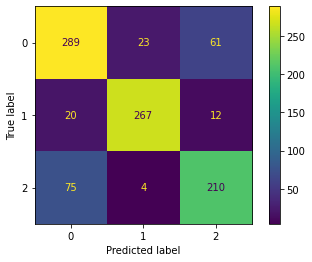

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       373
           1       0.91      0.89      0.90       299
           2       0.74      0.73      0.73       289

    accuracy                           0.80       961
   macro avg       0.80      0.80      0.80       961
weighted avg       0.80      0.80      0.80       961

accuracy_score =  0.7970863683662851


In [ ]:
cm = confusion_matrix(X_test['category'],preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
disp.plot()

plt.show()
print(classification_report(X_test['category'],preds))
print('accuracy_score = ', accuracy_score(X_test['category'], preds))

In [ ]:
submition = pd.read_csv('test_data.csv')

In [ ]:
submition['vector'] = submition['message'].apply(lambda x: avg_feature_vector(x, model_en, 100,))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
preds = log_reg.predict(submition.vector.to_list())

In [ ]:
len(preds)

5927

In [ ]:
preds

array([2, 2, 0, ..., 2, 2, 0])

In [ ]:
submition['category'] = preds

In [ ]:
submition.sample(20)

,id,message,encoded,category
3117,278794,"Tomorrow's gonna be a long-awaited jeans post. In the meantime, commercial pause: If you've been reading me a long time, you know that advertising on this channel is very rare. 'Cause I know a lot of people here trust me, and I don't want to write about stuff that doesn't make sense. But the useful/interesting stuff needs to be advertised: I'm telling you about the Tinkoff Platinum credit card with a high-cache cap on clothes/shoes/beautiful/phytness. Here's what the guys promise: 10% cashback for clothes, shoes, cosmetics and beauty parlors (the bank automatically determines which type of shop was purchased); 5% cashback for fitness and sports products; 1% bonus for all other purchases; up to 30% bonus for purchases from bank partners. You can write a map by reference--","[[1, 1524, 78, 25, 1, 10167, 1, 1, 19, 1, 1802, 1, 1, 1, 59, 1221, 393, 25, 576, 1, 625, 390, 22, 934, 173, 4, 665, 3, 227, 1, 1, 1, 390, 25, 251, 89, 646, 586, 28, 1, 15, 1, 1, 359, 46, 1206, 245, 5253, 22, 1, 239, 1, 1, 19, 1, 5253, 758, 46, 78, 1, 1, 2240, 625, 245, 19, 1, 1, 7578, 1586, 105, 25, 1, 5209, 173, 1, 1, 624, 19, 1448, 1], 80]",2
5534,3143362,"The denial phase of this canal as his own fat son, who keeps asking for macaroni and cheese, is over, back to broadcasting. Instagrams, I'd like to get a whole set of makeup from MUFE, 'cause I'm one fatty. And I'm gonna tell you about a couple of things that are highly enthralled by fluorescent people last night.","[[1, 3401, 2535, 89, 4, 7411, 80, 388, 282, 2489, 1, 391, 7222, 4493, 41, 1, 15, 1, 3, 1, 563, 46, 1, 1, 1, 649, 46, 1173, 25, 2295, 1949, 89, 423, 272, 1, 1, 1, 29, 1, 1, 1, 1524, 731, 625, 245, 25, 694, 89, 180, 22, 66, 219, 1, 275, 1, 646, 132, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 58]",2
985,276657,"Also, I will send individual messages to some students who appear based on my statistics that are putting effort but do not have their effort reflected in a suitable grade.","[[1, 1, 329, 3301, 4205, 8230, 46, 1124, 302, 391, 3882, 2168, 173, 421, 1412, 22, 66, 5252, 11526, 150, 71, 67, 458, 9, 11526, 5681, 5, 25, 877, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 30]",0
1731,277404,"Ah, okay.","[[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 2]",0
5125,3142953,"The current stage of Bitcoin's growth differs from the bull run three years ago by the significantly higher network hash rate. If in December 2017 the indicator was at the level of 14.14 EH / s, now it exceeds 126 EH / s, IntoTheBlock reports. This means the network has become more secure almost nine times.","[[1, 769, 3390, 89, 1, 188, 8618, 272, 19, 160, 719, 797, 689, 696, 275, 19, 279, 4444, 1196, 5222, 1, 1, 5, 1, 1, 19, 1711, 38, 164, 19, 305, 89, 1, 1, 381, 1, 181, 169, 3073, 1, 1, 381, 1, 1, 1, 1, 88, 19, 1196, 50, 1114, 32, 3644, 1437, 8171, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 56]",2
2534,278209,Don't tell me everyone has A.,"[[1, 731, 393, 650, 50, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]",0
12,275684,Let me go home.,"[[1, 393, 657, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 4]",0
2022,277695,You're not gonna make it at tore.,"[[1, 67, 1524, 239, 169, 164, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
answer = submition[['id', 'category']]

In [ ]:
answer.head()

,id,category
0,275672,2
1,275673,2
2,275674,0
3,275675,0
4,275676,0


In [ ]:
answer['category'].value_counts()

0    3692
2    1283
1     952
Name: category, dtype: int64

In [ ]:
answer.to_csv("submission.csv", index = False)

## Задание 2. В процессе решения у вас получилось некоторое признаковое пространство. Получите в нем представление для фразы "My future", а затем найдите ближайший пример из обучающей выборки. Полученным сообщением поделитесь с нами. Вот такое NLP-гадание.

In [45]:
def avg_feature_vector(sentence, model, num_features):
    words = sentence.lower().split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in model:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    else:
        return None
    return feature_vec

In [47]:
s1_afv =avg_feature_vector('my future', model_en, 100, )
min_dist = -1
sent_ans = None
for ind, sent in enumerate(df.message.to_list()):
    sent = ' '.join(review_to_sentences(sent, tokenizer)[0])
    s2_afv = avg_feature_vector(sent,  model_en, 100, )
    if s2_afv is None:
        continue
    sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
    if sim > min_dist:
        print(sent,'-simm-',sim)
        min_dist = sim
        sent_ans = sent

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


over million in bitcoin was electrocated in september with wrapped bitcoin wbtc data from coindesk -simm- -0.13078439235687256
quiz thursday or friday -simm- 0.19728077948093414
let s continue -simm- 0.24068954586982727
here comes your future palette -simm- 0.7712626457214355
katka s very kind today which you ll never say about me -simm- 0.790213406085968
i m kidding sometimes -simm- 0.8109585642814636
my colleagues and i don t dance well -simm- 0.8244302272796631
hello my lunoli -simm- 0.9393526315689087
hello my sick -simm- 0.9440061450004578
my zdes na english govorim je -simm- 0.9500523805618286
my future husband -simm- 0.9944271445274353
